<a href="https://colab.research.google.com/github/KEHSANN/hosh_masnoi/blob/main/q2_p1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

قسمت 1

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1Z0F4FumY-afZDuiWqiC8tI4-PPKvaKVJ
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 61.6MB/s]


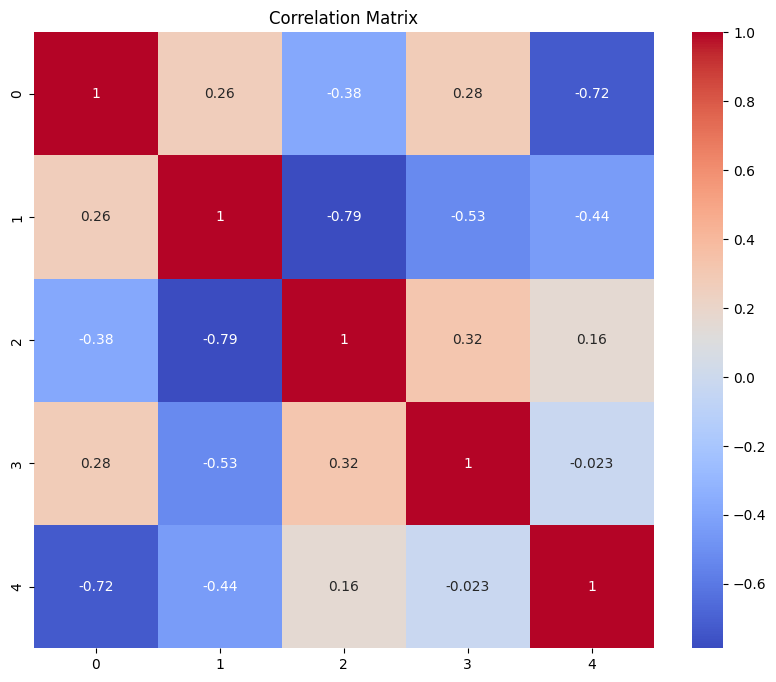

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Z0F4FumY-afZDuiWqiC8tI4-PPKvaKVJ
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the text file into a DataFrame
file_path = "/content/data_banknote_authentication.txt"
df = pd.read_csv(file_path, header=None)

# Save the DataFrame to a CSV file
csv_file_path = "/content/data_banknote_authentication.csv"
df.to_csv(csv_file_path, index=False)

df = pd.read_csv('/content/data_banknote_authentication.csv')
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




داده های ستون 3 و 4 وابستگی زیادی دارند یعنی میتوان یکی از آن هارا حذف کرد

[[ 1.19459724]
 [-1.67859227]
 [-1.0143093 ]
 [-1.09838699]
 [-0.32139787]]
[1.7429723158482038, 1.6860333224375057, 1.6313097096868634, 1.5785396358885044, 1.527549862483582, 1.4782276110672146, 1.430501236054375, 1.384326744390736, 1.3396782133263996, 1.296540850958135, 1.2549058979393413, 1.2147668597043189, 1.1761167422530452, 1.1389460779789813, 1.1032415954384298, 1.0689854245332893, 1.0361547475001534, 1.0047218143622778, 0.9746542448438882, 0.9459155411082149, 0.9184657394641234, 0.8922621354889996, 0.8672600259103442, 0.8434134214512365, 0.8206756966904621, 0.7990001547625608, 0.7783404955139865, 0.7586511848852671, 0.7398877304435985, 0.7220068730491698, 0.7049667077116608, 0.6887267480294201, 0.673247948528064, 0.6584926980804604, 0.6444247957416439, 0.6310094180851495, 0.6182130847521017, 0.6060036266395734, 0.5943501591230932, 0.5832230610370812, 0.5725939588811302, 0.5624357148871588, 0.5527224171415438, 0.5434293698478218, 0.5345330819626757, 0.5260112527579419, 0.517842

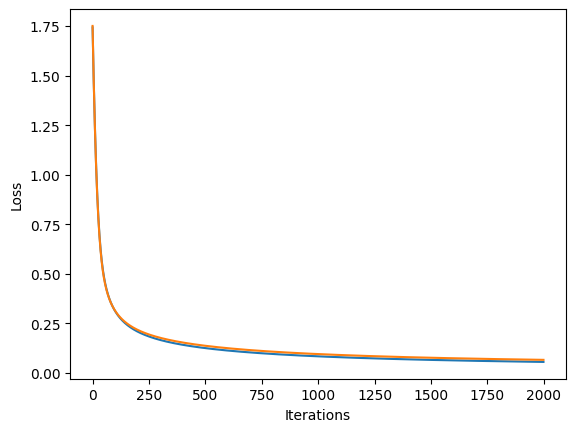

0.9709090909090909


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def logistic_regression(x , w):
  y_hat = sigmoid(x @ w)
  return y_hat

def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

def gradient(x, y, y_hat):

  grads = (x.T @ (y_hat - y) ) / len(y)
  return grads

def gradient_decent(w, eta, gradient1):

  w -= eta * gradient1
  return w

def accuracy(y, y_hat):

  acc = np.sum( np.round(y_hat) == y ) / len(y)
  return acc











X = df[['0','1','2','3']].values
y = df[['4']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=23)

X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))
X_train.shape

loss=[]
loss_test=[]
m=4
epoch=2000
eta=0.02


w = np.random.randn(m + 1, 1)
# X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
for h in range(epoch):
  y_hat = logistic_regression(X_train, w)
  y_hat_test = logistic_regression(X_test, w)
  e= bce(y_train, y_hat)
  e_test= bce(y_test, y_hat_test)

  loss_test.append(e_test)
  loss.append(e)
  gradient1=gradient(X_train, y_train, y_hat)
  w=gradient_decent(w, eta, gradient1)

print(w)
print(loss)
plt.plot(loss)
plt.plot(loss_test)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
Acc=accuracy(y_test,y_hat_test)
print(Acc)

قسمت 4

In [16]:
#راه اول

min_x = np.min(X)
max_x = np.max(X)
x_norm = (X - min_x) / (max_x - min_x)

print(x_norm)

#راه دوم
x_norm1 = (X - np.mean(X)) / np.std(X)
x_norm1


[[0.54872005 0.70785003 0.34591883 0.42037539]
 [0.57787732 0.69211842 0.35691866 0.3883535 ]
 [0.55642971 0.35124998 0.49517515 0.43783379]
 ...
 [0.31617167 0.00992098 0.98945758 0.3468715 ]
 [0.32205801 0.17004148 0.825416   0.39402533]
 [0.35429094 0.41371776 0.51914954 0.47217867]]


array([[ 0.70715227,  1.90377339, -0.81786658, -0.25797029],
       [ 0.92640827,  1.78547526, -0.7351504 , -0.49876761],
       [ 0.76512713, -0.77777758,  0.30450687, -0.12668712],
       ...,
       [-1.04155847, -3.34449372,  4.02139783, -0.81070275],
       [-0.99729452, -2.14042411,  2.78784263, -0.45611671],
       [-0.75491024, -0.3080341 ,  0.48478877,  0.13157857]])

قسمت 5

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]
[[0]
 [0]
 [0]
 [0]
 [1]]


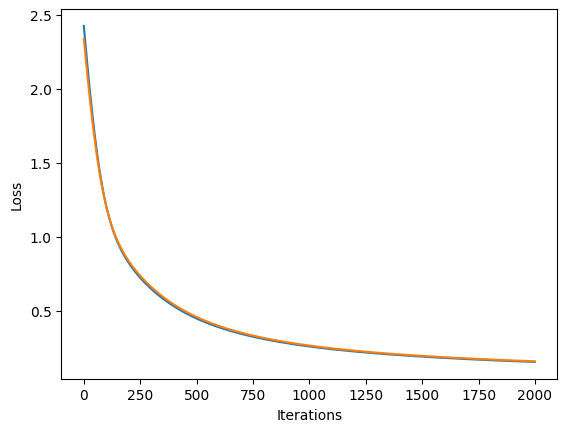

0.9745454545454545


In [20]:

X_train, X_test, y_train, y_test = train_test_split(x_norm1, y, test_size= 0.2 , random_state=23)

X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))
X_train.shape

loss=[]
loss_test=[]
m=4
epoch=2000
eta=0.02

w = np.random.randn(m + 1, 1)
for h in range(epoch):
  y_hat = logistic_regression(X_train, w)
  y_hat_test = logistic_regression(X_test, w)
  e= bce(y_train, y_hat)
  e_test= bce(y_test, y_hat_test)

  loss_test.append(e_test)
  loss.append(e)
  gradient1=gradient(X_train, y_train, y_hat)
  w=gradient_decent(w, eta, gradient1)

print(np.round(y_hat[:5]))
print(y_train[:5])
plt.plot(loss)
plt.plot(loss_test)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
Acc=accuracy(y_test,y_hat_test)
print(Acc)

قسمت 6

In [24]:



!pip install --upgrade --no-cache-dir gdown
!gdown 1Z0F4FumY-afZDuiWqiC8tI4-PPKvaKVJ
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the text file into a DataFrame
file_path = "/content/data_banknote_authentication.txt"
df = pd.read_csv(file_path, header=None)

# Save the DataFrame to a CSV file
csv_file_path = "/content/data_banknote_authentication.csv"
df.to_csv(csv_file_path, index=False)

df = pd.read_csv('/content/data_banknote_authentication.csv')


#روش اول
y_0 = 0
y_1 = 1
for c in y:
  if(c==0):
    y_0 += 1
  if(c==1):
    y_1 += 1

print(y_0)
print(y_1)

#روش دوم


# Count the number of samples in each class
class_counts = df["4"].value_counts()

# Print the class counts
print(class_counts)

#برابر کردن تعداد داده های کلاس 0 با  1
#از طریق حذف داده هایی از کلاس 0
df_y0=df[df["4"] == 0].index
remove_count = class_counts[0] - class_counts[1]
remove_indices = np.random.choice(df_y0, remove_count, replace=False)
df.drop(remove_indices, inplace=True)

# Count the number of samples in each class
class_counts = df["4"].value_counts()

# Print the class counts
print(class_counts)


Downloading...
From: https://drive.google.com/uc?id=1Z0F4FumY-afZDuiWqiC8tI4-PPKvaKVJ
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 90.5MB/s]
762
611
0    762
1    610
Name: 4, dtype: int64
0    610
1    610
Name: 4, dtype: int64


قسمت7

Downloading...
From: https://drive.google.com/uc?id=1Z0F4FumY-afZDuiWqiC8tI4-PPKvaKVJ
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 53.3MB/s]
0    610
1    610
Name: 4, dtype: int64
[[ 1.30244962]
 [-1.44764403]
 [-0.79577623]
 [-0.8758494 ]
 [-0.17795165]]
[2.4083665267334613, 2.3745728788881184, 2.3408538468990487, 2.307212006384426, 2.2736500327467204, 2.240170705169229, 2.2067769108367923, 2.173471649402943, 2.140258037731725, 2.10713931494661, 2.074118847822788, 2.041200136560915, 2.008386820986698, 1.9756826872227955, 1.9430916748839309, 1.9106178848492217, 1.8782655876681387, 1.846039232658815, 1.8139434577577722, 1.7819831001802493, 1.7501632079470786, 1.7184890523299885, 1.6869661412597508, 1.6556002337304903, 1.6243973552192954, 1.593363814120215, 1.5625062191671848, 1.5318314977886212, 1.5013469152977306, 1.4710600947750918, 1.4409790374432863, 1.4111121432659604, 1.3814682314249696, 1.352056560238423, 1.3228868459795087, 1.2939692799410896, 1.

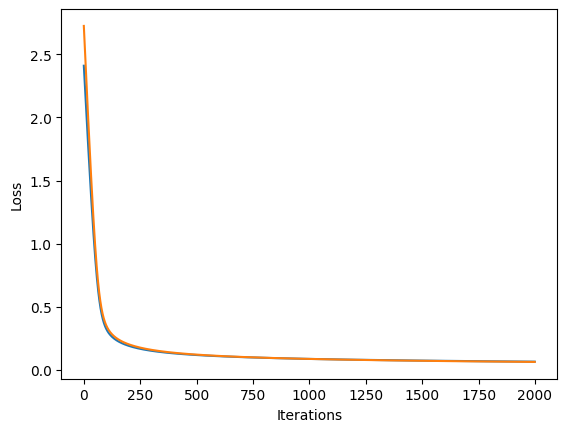

0.9836065573770492


In [28]:

import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade --no-cache-dir gdown
!gdown 1Z0F4FumY-afZDuiWqiC8tI4-PPKvaKVJ
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the text file into a DataFrame
file_path = "/content/data_banknote_authentication.txt"
df = pd.read_csv(file_path, header=None)

# Save the DataFrame to a CSV file
csv_file_path = "/content/data_banknote_authentication.csv"
df.to_csv(csv_file_path, index=False)

df = pd.read_csv('/content/data_banknote_authentication.csv')




df_y0=df[df["4"] == 0].index
remove_count = class_counts[0] - class_counts[1]
remove_indices = np.random.choice(df_y0, remove_count, replace=False)
df.drop(remove_indices, inplace=True)
# Get the class labels
class_labels = df["4"].unique()

# Count the number of samples in each class
class_counts = df["4"].value_counts()

# Print the class counts
print(class_counts)

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def logistic_regression(x , w):
  y_hat = sigmoid(x @ w)
  return y_hat

def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

def gradient(x, y, y_hat):

  grads = (x.T @ (y_hat - y) ) / len(y)
  return grads

def gradient_decent(w, eta, gradient1):

  w -= eta * gradient1
  return w

def accuracy(y, y_hat):

  acc = np.sum( np.round(y_hat) == y ) / len(y)
  return acc








# جدا کردن ستون آخر به عنوان بردار خروجی (y)

# y = df.iloc[:, -1]

# # جدا کردن ستون‌های دیگر به عنوان ویژگی‌ها (x)
# X = df.iloc[:, :-1]


X = df[['0','1','2','3']].values
y = df[['4']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=23)

X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))
X_train.shape

loss=[]
loss_test=[]
m=4
epoch=2000
eta=0.01
# y_train = np.array([y_train])
# y_train=y_train.T
w = np.random.randn(m + 1, 1)
# X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
for h in range(epoch):
  y_hat = logistic_regression(X_train, w)
  y_hat_test = logistic_regression(X_test, w)
  e= bce(y_train, y_hat)
  e_test= bce(y_test, y_hat_test)

  loss_test.append(e_test)
  loss.append(e)
  gradient1=gradient(X_train, y_train, y_hat)
  w=gradient_decent(w, eta, gradient1)

print(w)
print(loss)
plt.plot(loss)
plt.plot(loss_test)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
Acc=accuracy(y_test,y_hat_test)
print(Acc)